Exp 4 : Supervised Learning 

Classification

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [2]:
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train); 


In [5]:
y_pred = clf_tree.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1
 0 1 0]


Evaluation Metrics

In [6]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True Negatives {}".format(tn))
print("False Negatives {}".format(fn))
print("True Positives {}".format(tp))
print("False Positives {}".format(fp))


True Negatives 41
False Negatives 4
True Positives 66
False Positives 3


In [7]:
acc = (tn+tp)/(tn+tp+fn+fp)
print("Accuracy {}".format(acc))

Accuracy 0.9385964912280702


In [8]:
error_rate = (fn+fp)/(tn+tp+fn+fp)
print("Error Rate {}".format(error_rate))


Error Rate 0.06140350877192982


In [9]:
precision = tp/(tp+fp)
print("Precision {}".format(precision))

Precision 0.9565217391304348


In [10]:
sns = tp/(tp+fn)
spc = tn/(tn+fp)
print("Sensitivity {}".format(sns))
print("Specificity {}".format(spc))

Sensitivity 0.9428571428571428
Specificity 0.9318181818181818


In [11]:
import math
roc = math.sqrt((sns*sns)+(spc*spc))/math.sqrt(2)
print("ROC {}".format(roc))

ROC 0.9373539128322014


In [12]:
GM = math.sqrt(sns*spc)
print("Geometric Mean {}".format(GM))

Geometric Mean 0.9373214115613857


In [13]:
f1 = (2*sns*precision)/(precision+sns)
print("f1 score {}".format(f1))

f1 score 0.9496402877697843


In [14]:
fpr = 1-spc
fnr = 1 -sns
power = 1 - fnr
print("False positive Rate {}".format(fpr))
print("false negative Rate {}".format(fnr))
print("Power {}".format(power))

False positive Rate 0.06818181818181823
false negative Rate 0.05714285714285716
Power 0.9428571428571428


Plot ROC Curve

In [15]:

from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred))


roc_auc_score for DecisionTree:  0.9373376623376624


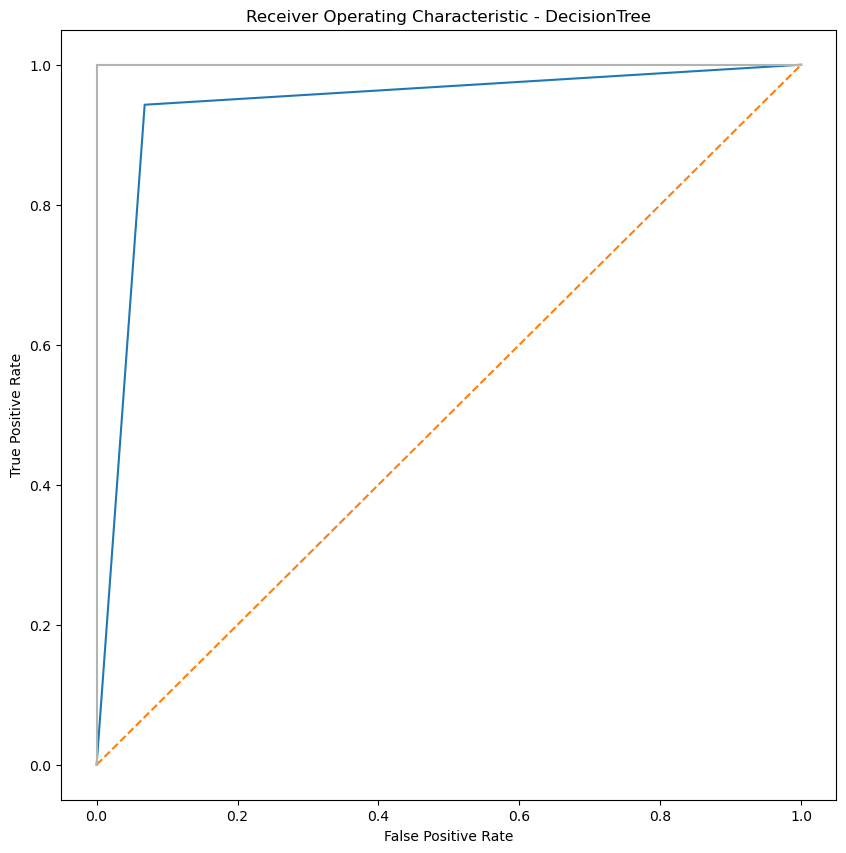

In [16]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0,1],ls='--')
plt.plot([0,0],[0,1],c='.7')
plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Regression

In [17]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(
    "C:\\Users\\DELL\\Desktop\\College\\Practicals-Apr-2025\\ADS_codes\\ADS Datasets\\iris.csv"
)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


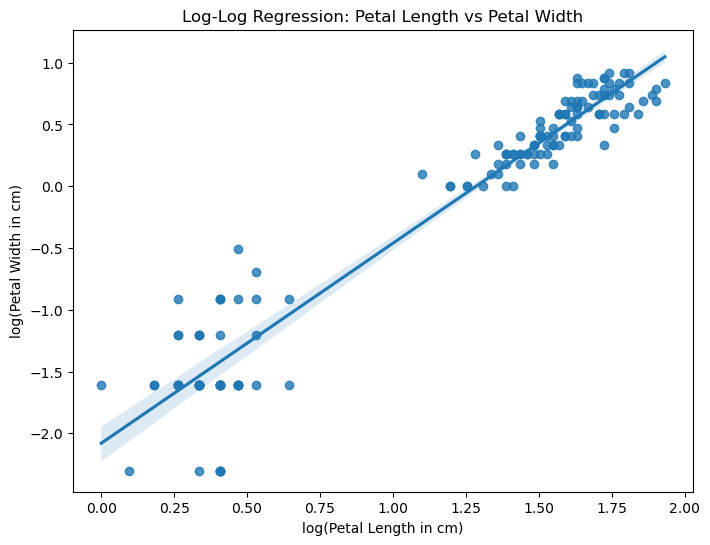

In [19]:
# Applying log-log regression and visualising with a regression plot
# We filter out rows where petal length or width is zero (to avoid log(0)).

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
df_iris = df[["PetalLengthCm", "PetalWidthCm"]].copy()

# Apply natural log transformation (avoid log(0) issues)
df_iris = df_iris[(df_iris["PetalLengthCm"] > 0) & (df_iris["PetalWidthCm"] > 0)]
df_iris["logPetalLength"] = np.log(df_iris["PetalLengthCm"])
df_iris["logPetalWidth"] = np.log(df_iris["PetalWidthCm"])

# Plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x="logPetalLength", y="logPetalWidth", data=df_iris, fit_reg=True)
plt.title("Log-Log Regression: Petal Length vs Petal Width")
plt.xlabel("log(Petal Length in cm)")
plt.ylabel("log(Petal Width in cm)")
plt.show()

In [20]:
# Use the already log-transformed columns from df_iris
X = df_iris[["logPetalLength"]]  # Feature
y = df_iris["logPetalWidth"]  # Target

In [21]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
print(y_pred)


[-1.53541404 -1.53541404 -1.65540256 -1.4237074  -1.53541404 -1.22105524
 -1.53541404 -1.4237074  -1.53541404 -1.4237074  -1.4237074  -1.31921281
 -1.53541404 -1.92588051 -1.78500003 -1.4237074  -1.65540256 -1.53541404
 -1.22105524 -1.4237074  -1.22105524 -1.4237074  -2.08019761 -1.22105524
 -1.04096936 -1.31921281 -1.31921281 -1.4237074  -1.53541404 -1.31921281
 -1.31921281 -1.4237074  -1.4237074  -1.53541404 -1.4237074  -1.78500003
 -1.65540256 -1.4237074  -1.65540256 -1.4237074  -1.65540256 -1.65540256
 -1.65540256 -1.31921281 -1.04096936 -1.53541404 -1.31921281 -1.53541404
 -1.4237074  -1.53541404  0.42546719  0.35506026  0.49293962  0.16435727
  0.3906464   0.35506026  0.42546719 -0.14711285  0.3906464   0.1233651
 -0.05184396  0.24335362  0.16435727  0.42546719 -0.00623238  0.31867437
  0.35506026  0.20433718  0.35506026  0.1233651   0.45955485  0.16435727
  0.49293962  0.42546719  0.28145195  0.31867437  0.45955485  0.5256499
  0.35506026 -0.05184396  0.08130808  0.03812942  0.1

Evaluation Metrics

In [22]:
from scipy.stats import pearsonr

list1 = df_iris["logPetalLength"]
list2 = df_iris["logPetalWidth"]

corr, _ = pearsonr(list1, list2)
print("Pearson's correlation: %.3f" % corr)

Pearson's correlation: 0.963


In [23]:
a = np.sum((y-y_pred)**2)
n =np.size(y)

mse = a/n
print("Mean Squared Error",mse)

Mean Squared Error 0.07140657822939575


In [24]:
rmse = math.sqrt(mse)
print("Root Mean Squared Error ",rmse)

Root Mean Squared Error  0.2672200932366347


In [25]:
q = np.sum((y-y_pred)**2)
my = np.sum(y)/n
mx =np.sum(X)/n
p = np.sum((y-my)**2)

R2 = 1-(q/p)
print("Coefficient of Determination ",R2)

Coefficient of Determination  0.9268607362429973


c:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [26]:
import numpy as np
import math

# Filter out zero values in the target
mask = y != 0
y_filtered = y[mask]
y_pred_filtered = y_pred[mask]

# Compute RMSRE
b = np.sum(((y_filtered - y_pred_filtered) / y_filtered) ** 2)
rmsre = math.sqrt(b / len(y_filtered))
print("Root Mean Squared Relative Error:", rmsre)

Root Mean Squared Relative Error: 0.48944332895973164


In [27]:
a = np.sum(abs(y-y_pred))
n =np.size(y)

mae = a/n
print("Mean Absolute Error ",mae)

Mean Absolute Error  0.18722666229741516


In [28]:
b = np.sum(abs((y_filtered-y_pred_filtered)/y))
mape = (100*b)/n
print("Mean absolute Percentage Error",mape)

Mean absolute Percentage Error 26.401003234029286
